# Naive Bayes Classifier - 新聞分類

利用貝式分類器進行新聞分類

## 資料集
[20種分類新聞資料集](http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

## Outline
- 讀取資料
- 資料過濾(停止詞、詞頻)
- 製作詞袋向量
- 訓練模型&測試

## 引入所需套件
- os
- string
- numpy
- matplotlib
- sklearn
    - model_selection
    - MultinomialNB
    - classification_report

In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### os.listdir
列表出指定路徑下的所有路徑及檔案(絕對/相對路徑)

In [39]:
os.listdir('20_newsgroups')

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [37]:
os.listdir('20_newsgroups/alt.atheism')

['49960',
 '51060',
 '51119',
 '51120',
 '51121',
 '51122',
 '51123',
 '51124',
 '51125',
 '51126',
 '51127',
 '51128',
 '51129',
 '51130',
 '51131',
 '51132',
 '51133',
 '51134',
 '51135',
 '51136',
 '51137',
 '51138',
 '51139',
 '51140',
 '51141',
 '51142',
 '51143',
 '51144',
 '51145',
 '51146',
 '51147',
 '51148',
 '51149',
 '51150',
 '51151',
 '51152',
 '51153',
 '51154',
 '51155',
 '51156',
 '51157',
 '51158',
 '51159',
 '51160',
 '51161',
 '51162',
 '51163',
 '51164',
 '51165',
 '51166',
 '51167',
 '51168',
 '51169',
 '51170',
 '51171',
 '51172',
 '51173',
 '51174',
 '51175',
 '51176',
 '51177',
 '51178',
 '51179',
 '51180',
 '51181',
 '51182',
 '51183',
 '51184',
 '51185',
 '51186',
 '51187',
 '51188',
 '51189',
 '51190',
 '51191',
 '51192',
 '51193',
 '51194',
 '51195',
 '51196',
 '51197',
 '51198',
 '51199',
 '51200',
 '51201',
 '51202',
 '51203',
 '51204',
 '51205',
 '51206',
 '51207',
 '51208',
 '51209',
 '51210',
 '51211',
 '51212',
 '51213',
 '51214',
 '51215',
 '51216',


## 讀取資料
內建讀檔function: 
> open(filename, mode, encoding)
- filename: 檔案名稱(絕對/相對路徑)
- mode: 讀檔模式
- encoding: 開啟檔案的編碼

In [5]:
X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element
for category in os.listdir('20_newsgroups'):
    for document in os.listdir('20_newsgroups/'+category):
        with open('20_newsgroups/'+category+'/'+document, "r", encoding='ISO-8859-1') as f:
            X.append((document, f.read()))
            Y.append(category)

In [40]:
X[0]

('49960',
 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resour

## 切割訓練集與測試集

In [12]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

## 停止詞表

In [13]:
# A list of common english words which should not affect predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

## 計算詞頻
字串處理

#### 切割字串
> str.split(str): <type str\>
 - str: 切割的字串(字元內容)
#### 去除頭尾
> str.strip(str): return <type str\>
 - str: 去除的字串(字元內容)
#### 小寫轉換
> str.lower(): return <type str\>

In [14]:
# Building a vocabulary of words from the given documents
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new] += 1
            else:
                vocab[word_new] = 1        

In [45]:
vocab['subject']

16224

## 觀察詞頻變化
> plt.axis: 設定顯示的範圍

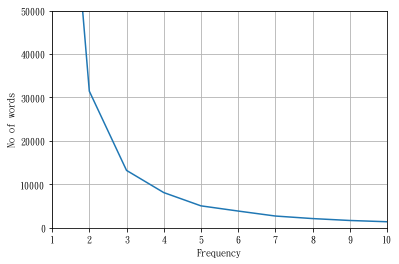

In [27]:
# Plotting a graph of no of words with a given frequency to decide cutoff drequency

num_words = [0 for i in range(max(vocab.values())+1)]
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
# plt.axis([1, 10, 0, 50000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

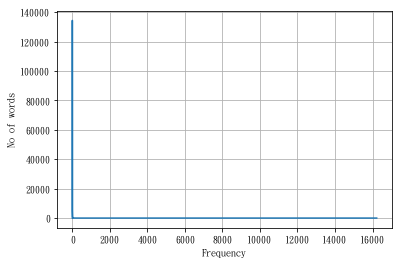

In [72]:
# Plotting a graph of no of words with a given frequency to decide cutoff drequency

num_words = [0 for i in range(max(vocab.values())+1)]
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

## 去除低頻詞
### 計算去除後總詞量

In [28]:
cutoff_freq = 80
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(80) : 4055


### 去除低頻詞

In [47]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

In [49]:
features[1000]

'tell'

## 製作詞袋向量(Bag of Word)
[詞袋向量](https://zh.wikipedia.org/wiki/%E8%AF%8D%E8%A2%8B%E6%A8%A1%E5%9E%8B)
1. 製作空矩陣
2. 將出現的詞+1數量

In [70]:
print(len(X_train), len(features))

14997 4055


In [32]:
# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    # print(i) # Uncomment to see progress
    word_list = [word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [55]:
X_train_dataset.shape

(14997, 4055)

In [33]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = []
    for word in X_test[i][1].split():
        word.append(word.strip(string.punctuation).lower())
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [65]:
X_test_dataset.shape

(5000, 4055)

## Naive Bayes Classification

#### Bernouli
只判斷字詞是否出現過，出現過=1，沒出現0
#### Multinomial
採用字詞出現頻率

## 建立且訓練模型

In [67]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## 測試模型結果

> predict(X): 輸入測試集，模型預測結果

> score(X, Y): 輸入測試集X&Y，並回傳平均準確率(accuracy)

> classification_report: 生成主要分類的文本報告

In [68]:
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
Y_test_pred = clf.predict(X_test_dataset)
print("Classification report for testing data :")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9065146362605855
Sklearn's score on testing data : 0.861
Classification report for testing data :
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.80      0.77       233
           comp.graphics       0.78      0.79      0.79       253
 comp.os.ms-windows.misc       0.83      0.82      0.83       249
comp.sys.ibm.pc.hardware       0.81      0.88      0.84       240
   comp.sys.mac.hardware       0.85      0.92      0.89       236
          comp.windows.x       0.93      0.83      0.88       240
            misc.forsale       0.81      0.87      0.84       261
               rec.autos       0.90      0.92      0.91       269
         rec.motorcycles       0.90      0.97      0.93       284
      rec.sport.baseball       0.99      0.97      0.98       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.96      0.90      0.93       233
      